<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Market_Research_Analyesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style


In [ ]:
print(pd.options.display.max_columns)

150


In [ ]:
pd.options.display.max_columns = 150 

In [ ]:
ncs = pd.read_csv('/content/drive/MyDrive/Dataset/2017-fCC-New-Coders-Survey-Data.csv')

<ipython-input-33-9ff2cc61ae56>:1: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  ncs = pd.read_csv('/content/drive/MyDrive/Dataset/2017-fCC-New-Coders-Survey-Data.csv')


In [ ]:
ncs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [ ]:
ncs.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [ ]:
ncs.dtypes.value_counts()

object     89
float64    12
dtype: int64

In [ ]:
float64_cols = ncs.select_dtypes(include=['float64'])
print(float64_cols.head())


    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
0  27.0               0.0             NaN                NaN   
1  34.0               0.0             NaN                NaN   
2  21.0               0.0             NaN                NaN   
3  26.0               0.0             NaN                NaN   
4  20.0               0.0             NaN                NaN   

   BootcampRecommend  ChildrenNumber  CodeEventConferences  \
0                NaN             NaN                   NaN   
1                NaN             NaN                   NaN   
2                NaN             NaN                   NaN   
3                NaN             NaN                   NaN   
4                NaN             NaN                   NaN   

   CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  \
0                   NaN           NaN               NaN               NaN   
1                   NaN           NaN               NaN               NaN   
2          

In [ ]:
ncs['JobRoleInterest'].value_counts()

Full-Stack Web Developer                                                                                                                                                                                                                                                                    823
  Front-End Web Developer                                                                                                                                                                                                                                                                   450
  Data Scientist                                                                                                                                                                                                                                                                            152
Back-End Web Developer                                                                                                                  

In [ ]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = ncs['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

In [ ]:
splitted_interests.value_counts()

[Full-Stack Web Developer]                                                                                                                                                                                                                                                                                823
[  Front-End Web Developer]                                                                                                                                                                                                                                                                               450
[  Data Scientist]                                                                                                                                                                                                                                                                                        152
[Back-End Web Developer]                                                                      

Each value represents how many job interests per surveyee. 31% of participants were interested in one specific type of coding but overall the marjority of participants were interested in several. This could imply broad interest or uncertainity.

In [ ]:
n_ops_t = [len(interest) for interest in splitted_interests]
n_ops_t = pd.Series(n_ops_t)
n_ops_t.value_counts(normalize=True)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
dtype: float64

In [ ]:
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Text(0, 0.5, 'Percentages')

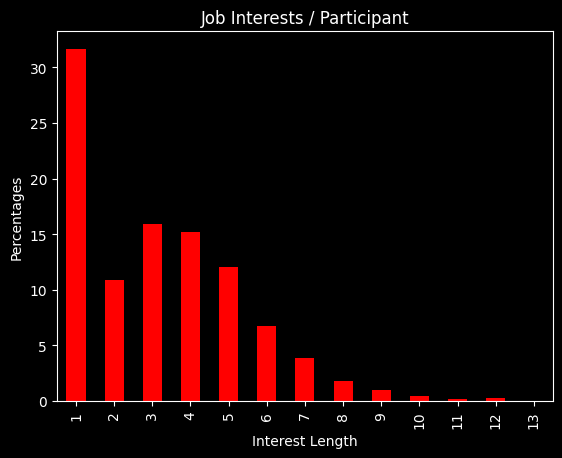

In [ ]:
style.use('dark_background')
pd.Series(n_of_options.value_counts(normalize = True).sort_index() * 100).plot.bar(color='red')
plt.title('Job Interests / Participant')
plt.xlabel('Interest Length')
plt.ylabel('Percentages')

CountryCitizen CountryLive

In [ ]:
nationality_fq = ncs['CountryCitizen'].value_counts()
print(nationality_fq)

United States of America    5480
India                       1594
United Kingdom               640
Canada                       564
Brazil                       399
                            ... 
Pitcairn Island                1
Aruba                          1
Central African Republic       1
Norfolk Island                 1
Brunei                         1
Name: CountryCitizen, Length: 181, dtype: int64


In [ ]:
country_residence = ncs['CountryLive'].value_counts()
print(country_residence)

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
                            ... 
Liberia                        1
Guadeloupe                     1
Curacao                        1
Gibraltar                      1
Hawaii                         1
Name: CountryLive, Length: 172, dtype: int64


In [ ]:
country_residence_pct = ncs['CountryLive'].value_counts(normalize=True)
print(country_residence_pct)

United States of America    0.377608
India                       0.091288
United Kingdom              0.049361
Canada                      0.040167
Brazil                      0.023735
                              ...   
Liberia                     0.000065
Guadeloupe                  0.000065
Curacao                     0.000065
Gibraltar                   0.000065
Hawaii                      0.000065
Name: CountryLive, Length: 172, dtype: float64


In [ ]:
# ncs['MoneyForLearning'].value_counts()
country_india = ncs.query("`CountryLive` == 'India'")['MoneyForLearning']
country_india.value_counts(normalize='True')

0.0       0.570513
100.0     0.071314
500.0     0.035256
200.0     0.033654
1000.0    0.032051
            ...   
460.0     0.000801
35.0      0.000801
6.0       0.000801
1150.0    0.000801
550.0     0.000801
Name: MoneyForLearning, Length: 96, dtype: float64

There is a max value of 100000 which is bringing the mean up.

In [ ]:
country_india.describe()

count      1248.000000
mean        447.001603
std        3505.902546
min           0.000000
25%           0.000000
50%           0.000000
75%         100.000000
max      100000.000000
Name: MoneyForLearning, dtype: float64

In [ ]:
country_india_over500 = ncs.query("`CountryLive` == 'India' and `MoneyForLearning` > 500")
country_india_over500.shape

(121, 136)

In [ ]:
country_uk = ncs.query("`CountryLive` == 'United Kingdom'")['MoneyForLearning']
country_uk.value_counts(normalize='True')

0.0        0.478933
100.0      0.067416
200.0      0.050562
50.0       0.042135
500.0      0.037921
             ...   
15000.0    0.001404
26.0       0.001404
18.0       0.001404
49.0       0.001404
140.0      0.001404
Name: MoneyForLearning, Length: 73, dtype: float64

In [ ]:
country_uk_over500 = ncs.query("`CountryLive` == 'United Kingdom' and `MoneyForLearning` > 500")
country_uk_over500.shape

(86, 136)

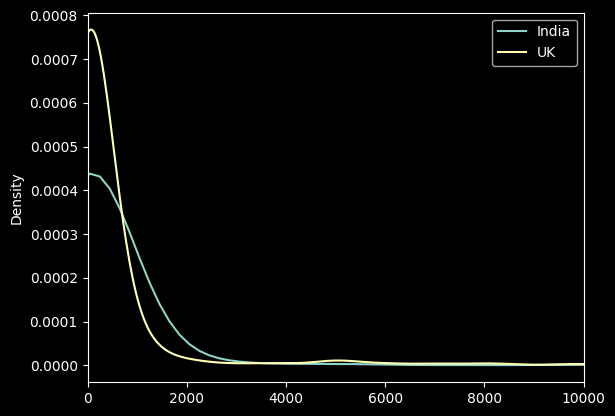

In [ ]:
pd.Series(country_india).plot.kde(xlim = (0, 10000), label = 'India')
pd.Series(country_uk).plot.kde(xlim = (0, 10000), label = 'UK')
plt.legend()

In [ ]:
country_india_pay = ncs.query("`CountryLive` == 'India' and `MoneyForLearning` > 0")['MoneyForLearning']
country_uk_pay = ncs.query("`CountryLive` == 'United Kingdom' and `MoneyForLearning` > 0")['MoneyForLearning']

In [ ]:
country_india_pay.shape


In [ ]:
country_uk_pay.shape

In [ ]:
print(country_india_pay)

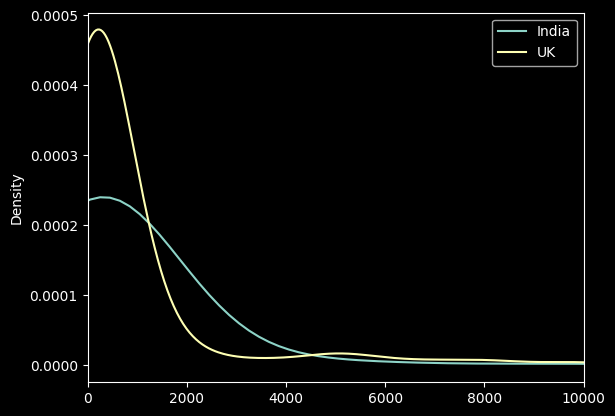

In [153]:
pd.Series(country_india_pay).plot.kde(xlim = (0, 10000), label = 'India')
pd.Series(country_uk_pay).plot.kde(xlim = (0, 10000), label = 'UK')
plt.legend()

In [156]:
highest_budget_countries = ncs.query('`MoneyForLearning` > 500')['CountryLive']

In [157]:
highest_budget_countries.value_counts()

United States of America    1110
India                        121
Canada                       118
United Kingdom                86
Spain                         60
                            ... 
Yemen                          1
Angola                         1
Algeria                        1
Puerto Rico                    1
Iraq                           1
Name: CountryLive, Length: 113, dtype: int64

In [159]:
money_for_learning = ncs.query('`MoneyForLearning` > 0')['CountryLive']

In [160]:
money_for_learning.value_counts()

United States of America    3197
India                        536
United Kingdom               371
Canada                       307
Brazil                       182
                            ... 
Gibraltar                      1
Yemen                          1
Ethiopia                       1
Armenia                        1
Gambia                         1
Name: CountryLive, Length: 147, dtype: int64

India is the best market after the United States to advertise in, it has the next most amount of students willing to spend money on learning and it also has second to the United States in people willing to spend money on learning.

In [178]:
us_avg_school_budget = ncs.query("`CountryLive` == 'United States of America'")['MoneyForLearning'].mean()
us_avg_school_budget

1509.617299426934

In [179]:
india_avg_school_budget = ncs.query("`CountryLive` == 'India'")['MoneyForLearning'].mean()
india_avg_school_budget

447.00160256410254

In [185]:
us_buyer_avg_budget = ncs.query("`CountryLive` == 'United States of America' and `MoneyForLearning` > 0")['MoneyForLearning'].mean()
us_buyer_avg_budget

2636.7541445104785

In [187]:
india_buyer_avg_budget = ncs.query("`CountryLive` == 'India' and `MoneyForLearning` > 0")['MoneyForLearning'].mean()
uk_buyer_avg_budget = ncs.query("`CountryLive` == 'United Kingdom' and `MoneyForLearning` > 0")['MoneyForLearning'].mean()

In [188]:
print(india_buyer_avg_budget, uk_buyer_avg_budget, sep='\n')

1040.7798507462687
902.9353099730458


In [190]:
ncs['MonthsProgramming'].describe()

count    17084.000000
mean        20.790447
std         41.722826
min          0.000000
25%          3.000000
50%          9.000000
75%         24.000000
max        744.000000
Name: MonthsProgramming, dtype: float64

In [191]:
ncs['MonthsProgramming'] = ncs['MonthsProgramming'].replace(0, 1)


Months programming 0 is indicative of someone who just started - to avoid dividing by 0 we are gonna convert the minimum value to 1

In [192]:
ncs['MonthsProgramming'].describe()

count    17084.000000
mean        20.824280
std         41.706355
min          1.000000
25%          3.000000
50%          9.000000
75%         24.000000
max        744.000000
Name: MonthsProgramming, dtype: float64

In [204]:
pct_null2 = ncs.notnull().sum() / ncs.sum()

TypeError: ignored

In [ ]:
col_ratios = {}
def smart_div(arr1, arr2):
  if arr1 < arr2:
    col_ratios =  arr1 / arr2
  else:
    col_ratios = arr2 / arr1
  
col_pct_test = smart_div(ncs.isnull().sum(), ncs.notnull().sum())

In [214]:
def smart_div(arr1, arr2):
  if arr1 < arr2:
    return arr1 / arr2
  else:
    return arr2 / arr1

missing_values = ncs.isnull().sum()
non_missing_values = ncs.notnull().sum()

col_pct_test = missing_values.combine(non_missing_values, smart_div)


In [215]:
col_pct_test

Age                    0.182729
AttendedBootcamp       0.026314
BootcampFinish         0.062493
BootcampLoanYesNo      0.063114
BootcampName           0.055091
                         ...   
YouTubeMIT             0.224071
YouTubeMozillaHacks    0.035436
YouTubeOther           0.071576
YouTubeSimplilearn     0.011183
YouTubeTheNewBoston    0.194545
Length: 136, dtype: float64

In [216]:
def smart_div(arr1, arr2):
  total = arr1 + arr2
  if arr1 < arr2:
    return arr1 / total
  else:
    return arr2 / total

missing_values = ncs.isnull().sum()
non_missing_values = ncs.notnull().sum()

col_pct_test = missing_values.combine(non_missing_values, smart_div)


In [217]:
col_pct_test

Age                    0.154498
AttendedBootcamp       0.025640
BootcampFinish         0.058817
BootcampLoanYesNo      0.059367
BootcampName           0.052215
                         ...   
YouTubeMIT             0.183054
YouTubeMozillaHacks    0.034223
YouTubeOther           0.066795
YouTubeSimplilearn     0.011059
YouTubeTheNewBoston    0.162861
Length: 136, dtype: float64

In [199]:
pct_null = ncs.isnull().sum() / ncs.notnull().sum()
pct_null

Age                     0.182729
AttendedBootcamp        0.026314
BootcampFinish         16.001871
BootcampLoanYesNo      15.844300
BootcampName           18.151739
                         ...    
YouTubeMIT              4.462879
YouTubeMozillaHacks    28.220257
YouTubeOther           13.971170
YouTubeSimplilearn     89.422886
YouTubeTheNewBoston     5.140203
Length: 136, dtype: float64

In [200]:
ncs.isnull().sum()

Age                     2808
AttendedBootcamp         466
BootcampFinish         17106
BootcampLoanYesNo      17096
BootcampName           17226
                       ...  
YouTubeMIT             14848
YouTubeMozillaHacks    17553
YouTubeOther           16961
YouTubeSimplilearn     17974
YouTubeTheNewBoston    15215
Length: 136, dtype: int64

In [201]:
ncs.notnull().sum()

Age                    15367
AttendedBootcamp       17709
BootcampFinish          1069
BootcampLoanYesNo       1079
BootcampName             949
                       ...  
YouTubeMIT              3327
YouTubeMozillaHacks      622
YouTubeOther            1214
YouTubeSimplilearn       201
YouTubeTheNewBoston     2960
Length: 136, dtype: int64

It seems like a null value for a lot of these columns is just indicative of a negative value - for example Bootcamp finish is null for the majority of the participants because they have not completed the bootcamp

In [203]:
ncs.notnull().corr()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
Age,1.000000,0.200338,-0.002486,-0.002768,0.004529,-0.002082,0.157338,0.916553,-0.007724,-0.026496,-0.014148,0.004622,-0.000137,-0.015429,0.031050,-0.032563,0.005960,-0.008679,-0.006165,-0.011844,-0.017826,-0.013802,-0.010135,-0.008336,0.412761,0.929299,0.922238,0.362841,0.103471,0.768307,0.087260,0.011636,0.207554,-0.008292,0.940224,0.015236,0.205520,0.915130,0.920022,0.921301,0.301327,0.908428,0.301519,0.120371,0.151331,NaN,0.919463,0.356850,0.911765,0.901611,0.116348,0.412576,-0.015214,0.004615,-0.011663,-0.015418,-0.008512,0.015827,0.008746,0.006848,-0.020099,-0.004042,-0.011287,-0.004076,-0.011890,0.003803,0.031341,-0.014069,0.290134,-0.010652,0.928436,0.927072,0.172622,0.175884,NaN,NaN,NaN,0.919463,0.919463,0.004407,0.016893,-0.017029,0.007355,-0.003985,-0.009216,-0.029411,0.002214,-0.003297,0.016816,-0.015281,-0.001762,0.003026,-0.006130,0.009440,-0.002290,0.004753,0.041959,0.020910,0.009985,0.030538,0.017907,0.000688,0.049698,-0.022350,0.026988,0.018914,0.037399,0.022143,0.002777,0.013311,0.007657,0.055875,0.019914,0.011119,0.045020,0.041117,0.921856,0.383106,0.199728,-0.003614,0.007962,0.013049,0.023286,-0.000324,0.019346,0.028412,0.031531,0.017866,-0.003165,0.006146,0.007820,0.008273,-0.012479,0.008268,-0.001377,0.014147
AttendedBootcamp,0.200338,1.000000,0.040552,0.040753,0.038075,0.040632,0.033763,0.205408,0.028497,-0.006494,0.008103,0.012322,0.007180,0.030957,0.032882,0.003229,0.028893,0.015208,0.001675,-0.006623,0.003979,0.016350,0.005059,0.023520,0.110062,0.201148,0.201557,0.095994,0.028943,0.183345,0.020633,0.061640,0.037782,0.010949,0.196337,0.008937,0.036535,0.202031,0.205014,0.204900,0.081648,0.206832,0.080998,0.038426,0.414236,NaN,0.140740,0.101195,0.206902,0.206932,0.287835,0.108951,0.035461,0.040275,0.014925,0.020000,0.023435,0.034107,0.041657,0.026407,0.022

In [231]:
def get_top_correlations(df, n=10):
    corr_matrix = df.corr().abs()
    # Fill diagonal with NaNs
    for x in range(corr_matrix.shape[0]):
        corr_matrix.iloc[x,x] = np.NaN
    corr_unstack = corr_matrix.unstack()
    return corr_unstack.sort_values(ascending=False).drop_duplicates()[0:n]

top_correlations = get_top_correlations(ncs, 10)
print(top_correlations)


HasChildren             Age                  0.522257
Income                  HomeMortgageOwe      0.476693
IsSoftwareDev           BootcampFinish       0.446341
HasFinancialDependents  Age                  0.360542
HasHomeMortgage         Age                  0.338987
HasDebt                 Age                  0.334996
FirstDevJob             MonthsProgramming    0.317342
BootcampFinish          HoursLearning        0.315306
AttendedBootcamp        MoneyForLearning     0.312869
HasFinancialDependents  HasHomeMortgage      0.312072
dtype: float64


In [232]:
us_filter = ncs.query("`CountryLive` == 'United States of America'")
india_filter = ncs.query("`CountryLive` == 'India'")

In [233]:
top_correlations_us = get_top_correlations(us_filter, 10)
top_correlations_us

IsSoftwareDev      BootcampFinish            0.521121
HomeMortgageOwe    Income                    0.511418
BootcampFinish     HoursLearning             0.451796
MoneyForLearning   AttendedBootcamp          0.422981
HomeMortgageOwe    ExpectedEarning           0.393748
MonthsProgramming  FirstDevJob               0.375362
IsUnderEmployed    BootcampFinish            0.374551
Age                HasFinancialDependents    0.355167
                   HasHomeMortgage           0.354257
HasHomeMortgage    HasFinancialDependents    0.348889
dtype: float64

In [234]:
top_correlations_india = get_top_correlations(india_filter, 10)
top_correlations_india

ChildrenNumber     StudentDebtOwe       1.000000
ExpectedEarning    BootcampLoanYesNo    0.999201
ChildrenNumber     ExpectedEarning      0.801762
Income             ExpectedEarning      0.757866
IsUnderEmployed    BootcampFinish       0.707107
BootcampRecommend  IsUnderEmployed      0.666667
IsUnderEmployed    BootcampLoanYesNo    0.632456
BootcampFinish     HomeMortgageOwe      0.626596
HasHomeMortgage    BootcampLoanYesNo    0.612372
Age                HasChildren          0.603278
dtype: float64

In [246]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

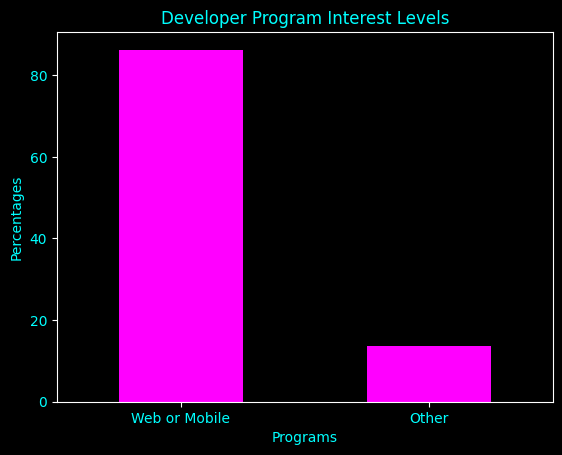

In [272]:
freq_table.plot.bar(color='magenta')
plt.title('Developer Program Interest Levels', color='cyan')
plt.xticks([0,1], ['Web or Mobile', 'Other'], rotation=0 , color='cyan')
plt.ylabel('Percentages', color='cyan')
plt.xlabel('Programs', color='cyan')
plt.yticks(color='cyan')


In [275]:
# create a new df that only contains participants who selected at least one job interest
ncs_comp = ncs[ncs['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_frequencies = ncs_comp['CountryLive'].value_counts()
relative_frequencies = ncs_comp['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


In [280]:
ncs_good = ncs.notnull().copy()

In [281]:
ncs.shape

(18175, 136)

In [282]:
ncs_good.shape

(18175, 136)

In [287]:
ncs_good['MonthsProgramming'].replace(0,1, inplace = True)

In [293]:
ncs_good['MoneyForLearning'] = pd.to_numeric(ncs_good['MoneyForLearning'], errors='coerce')
ncs_good['MonthsProgramming'] = pd.to_numeric(ncs_good['MonthsProgramming'], errors='coerce')


In [297]:
print(ncs['money_per_month'])

0           25.000000
1           13.333333
2          200.000000
3            0.000000
4            0.000000
             ...     
18170       10.000000
18171    10000.000000
18172        6.333333
18173        0.000000
18174             NaN
Name: money_per_month, Length: 18175, dtype: float64


In [299]:
print(ncs['money_per_month'].notnull().value_counts())

True     16180
False     1995
Name: money_per_month, dtype: int64


In [301]:
avg_spent_month = ncs['money_per_month'].mean()
avg_spent_month

132.08068116374352

In [303]:
avg_spent_month_us = ncs.query("`CountryLive` == 'United States of America'")['money_per_month'].mean()
avg_spent_month_us

206.29771071791808

In [304]:
avg_spent_month_india = ncs.query("`CountryLive` == 'India'")['money_per_month'].mean()
avg_spent_month_india

66.5261980990356

In [305]:
avg_spent_month_uk = ncs.query("`CountryLive` == 'United Kingdom'")['money_per_month'].mean()
avg_spent_month_uk

55.77498025998431

In [306]:
avg_spent_month_ca = ncs.query("`CountryLive` == 'Canada'")['money_per_month'].mean()
avg_spent_month_ca

118.43405393433031

In [313]:
ca_respondents = ncs.query("`CountryLive` == 'Canada'").shape[0]
print(ca_respondents)

616


In [312]:
india_respondents = ncs.query("`CountryLive` == 'India'").shape[0]

In [318]:
ca_spend = avg_spent_month_ca * ca_respondents 
ca_spend

72955.37722354748

In [317]:
india_spend = avg_spent_month_india * india_respondents
india_spend

93136.67733864984

In [319]:
india_respondents = ncs.query("`CountryLive` == 'India'").shape[0]

In [320]:
india_respondentsnotnull = ncs.query("`CountryLive` == 'India'").notnull().shape[0]

In [327]:
null_money_per_month = ncs[ncs['money_per_month'].isnull()]['CountryLive']


In [328]:
null_money_per_month.value_counts()

United States of America    320
India                       179
United Kingdom               59
Russia                       49
Brazil                       49
                           ... 
Aruba                         1
Cambodia                      1
Benin                         1
Norway                        1
Guatemala                     1
Name: CountryLive, Length: 105, dtype: int64

In [329]:
# Copy the DataFrame
ncs_copy = ncs.copy()

# Drop the rows where 'money_per_month' is null
ncs_copy = ncs_copy.dropna(subset=['money_per_month'])


We can see null values are not included in aggregate calculations like mean

In [330]:
avg_spent_month_us = ncs_copy.query("`CountryLive` == 'United States of America'")['money_per_month'].mean()
avg_spent_month_us

206.29771071791808

In [ ]:
# Isolate only the countries of interest
only_4 = ncs_copy[ncs_copy['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


In [339]:
only_4b = ncs_copy.query("`CountryLive` == 'United States of America' or `CountryLive` == 'India' or `CountryLive` == 'United Kingdom' or `CountryLive` == 'Canada'")


SyntaxError: ignored

In [333]:
only_4b = ncs_copy.query("`CountryLive` == 'United States of America' or 'India' or 'United Kingdom' or 'Canada'")['money_per_month']['CountryLive']

NotImplementedError: ignored

In [340]:
only_4b = ncs_copy.query(
    "`CountryLive` == 'United States of America' or "
    "`CountryLive` == 'India' or "
    "`CountryLive` == 'United Kingdom' or "
    "`CountryLive` == 'Canada'"
)


In [357]:
avg_per_month_country = only_4b.groupby(by='CountryLive')['money_per_month'].mean()

In [358]:
print(avg_per_month_country)

CountryLive
Canada                      118.434054
India                        66.526198
United Kingdom               55.774980
United States of America    206.297711
Name: money_per_month, dtype: float64


<Axes: ylabel='CountryLive'>

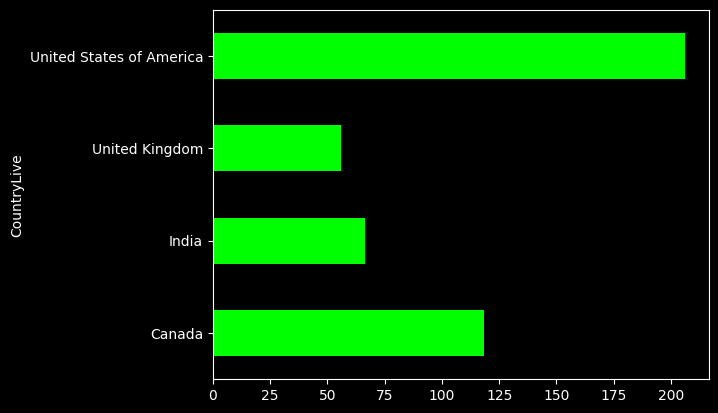

In [370]:
pd.Series(avg_per_month_country).plot.barh(color='lime')

In [374]:
ncs_copy = ncs_copy[ncs_copy['money_per_month'] < 20000]

In [376]:
only_4b = ncs_copy.query(
    "`CountryLive` == 'United States of America' or "
    "`CountryLive` == 'India' or "
    "`CountryLive` == 'United Kingdom' or "
    "`CountryLive` == 'Canada'"
)


In [377]:
avg_per_month_country = only_4b.groupby(by='CountryLive')['money_per_month'].mean()

After dropping our outlier larger values (spend per month > 20000) our average spend per month by country has decreased.

In [378]:
print(avg_per_month_country)

CountryLive
Canada                      118.434054
India                        66.526198
United Kingdom               55.774980
United States of America    158.919644
Name: money_per_month, dtype: float64


In [381]:
country_spend_mean = {}
for country in ncs_copy['CountryLive'].unique():  # Loop over unique country names
    country_spend_mean[country] = ncs_copy[ncs_copy['CountryLive'] == country]['money_per_month'].mean()


In [382]:
print(country_spend_mean)

{'Canada': 118.43405393433031, 'United States of America': 158.91964422570982, 'Brazil': 56.85019908853934, 'Portugal': 176.13027180406212, 'United Kingdom': 55.77498025998431, 'Mexico': 38.14772366408709, 'Germany': 35.33184985639155, 'Macedonia': 64.39325396825396, 'Romania': 29.764535389406685, 'Malaysia': 68.87777777777778, nan: nan, 'Argentina': 37.502190170940175, 'Venezuela': 83.1219362745098, 'Colombia': 59.80252619497902, 'Australia': 114.30610541130085, 'India': 66.5261980990356, 'Peru': 24.05475063131313, 'Cambodia': 13.605654761904763, 'New Zealand': 285.678857022607, 'Kyrgyzstan': 5.050505050505051, 'Israel': 131.2981601731602, 'Russia': 35.88356635051461, 'South Africa': 53.98027517836839, 'Egypt': 27.090239858906525, 'Lithuania': 48.392682926829266, 'Finland': 28.851934523809522, 'Belgium': 43.031531531531535, 'Bosnia & Herzegovina': 14.40735835801625, 'Great Britain': 20.51466049382716, 'Czech Republic': 43.185501066098084, 'Netherlands (Holland, Europe)': 21.5516234403

In [383]:
country_spend_avgs = pd.DataFrame.from_dict(country_spend_mean, orient='index')

In [386]:
country_spend_avgs.sort_values(by=0, ascending=False)

,0
Yemen,5000.000000
Jamaica,518.247863
Austria,397.392153
Malawi,378.583333
New Zealand,285.678857
...,...
Isle of Man,0.000000
Kuwait,0.000000
Haiti,0.000000
Sudan,0.000000


In [387]:
country_counts = ncs_copy['CountryLive'].value_counts()

In [394]:
country_counts.mean()

83.125

In [388]:
mask = ncs_copy['CountryLive'].map(country_counts) >= 100

In [389]:
ncs_copy = ncs_copy[mask]


In [390]:
country_spend_mean = {}
for country in ncs_copy['CountryLive'].unique():  # Loop over unique country names
    country_spend_mean[country] = ncs_copy[ncs_copy['CountryLive'] == country]['money_per_month'].mean()


In [391]:
country_spend_avgs = pd.DataFrame.from_dict(country_spend_mean, orient='index')

By eliminating countries with less than 100 rows we have a much more accurate representation

In [393]:
country_spend_avgs.sort_values(by=0, ascending=False).head(10)

,0
Spain,209.821766
United States of America,158.919644
Canada,118.434054
Australia,114.306105
Nigeria,107.257487
Poland,94.262158
Turkey,78.413921
India,66.526198
Brazil,56.850199
United Kingdom,55.774980


In [395]:
country_counts = ncs_copy['CountryLive'].value_counts()

By eliminating countries with less than 100 results our mean results per country went from 83 to 487

In [396]:
country_counts.mean()

487.7391304347826

In [398]:
ncs_copy.query("`CountryLive` =='Spain'").shape[0]

189

In [400]:
avg_age_bootcamp = ncs.query("`AttendedBootcamp` == 1")['Age'].mean()
avg_age_bootcamp

30.142546245919476

In [402]:
avg_age_bootcamp_finish = ncs.query("`BootcampFinish` == 1")['Age'].mean()
avg_age_bootcamp_finish

30.4359375

In [405]:
boot_camp_pop = ncs['AttendedBootcamp'].value_counts()
boot_camp_pop

0.0    16611
1.0     1098
Name: AttendedBootcamp, dtype: int64

In [412]:
boot_camp_pop_pct = boot_camp_pop.iloc[1] / (boot_camp_pop.iloc[0] + boot_camp_pop.iloc[1])
print('Bootcamp Attendance Rate', round(boot_camp_pop_pct, 3) * 100,'%')

Bootcamp Attendance Rate 6.2 %
